In [1]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [2]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [3]:
df.shape

(20800, 5)

In [4]:
###Drop Nan Values
df=df.dropna()
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
## Get the Independent Features
X=df.drop('label',axis=1)

In [6]:
X

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [7]:
## Get the Dependent features
y=df['label']

In [8]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64

In [9]:
y.value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [10]:
X.shape

(18285, 4)

In [11]:
y.shape

(18285,)

In [12]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
### Vocabulary size
voc_size=5000

### Onehot Representation

In [13]:
messages=X.copy()

In [14]:
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [15]:
messages.reset_index(inplace=True)

In [16]:
import nltk
import re
from nltk.corpus import stopwords

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91733\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split() 
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [19]:
corpus[:3]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire']

In [20]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]

### Embedding Representation

In [21]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2110 2423 1091]
 [   0    0    0 ... 3674  905 3178]
 [   0    0    0 ... 1997 4103 3223]
 ...
 [   0    0    0 ... 4506 3224 3170]
 [   0    0    0 ... 4548  593 4337]
 [   0    0    0 ...  853 1656 2783]]


In [22]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1526,
       3248,  314,   10, 3995, 3044, 4610, 2110, 2423, 1091])

In [23]:
## Creating model with LSTM
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
## Creating model with Bidirectional LSTM
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
len(embedded_docs),y.shape

(18285, (18285,))

In [26]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [27]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

### Model Training

In [29]:
### Finally Training
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 10s 50ms/step - loss: 0.3013 - accuracy: 0.8559 - val_loss: 0.2057 - val_accuracy: 0.9133
Epoch 2/10
192/192 [==============================] - 7s 36ms/step - loss: 0.1359 - accuracy: 0.9472 - val_loss: 0.1979 - val_accuracy: 0.9185
Epoch 3/10
192/192 [==============================] - 7s 36ms/step - loss: 0.0917 - accuracy: 0.9659 - val_loss: 0.2960 - val_accuracy: 0.9135
Epoch 4/10
192/192 [==============================] - 7s 36ms/step - loss: 0.0636 - accuracy: 0.9774 - val_loss: 0.2933 - val_accuracy: 0.9092
Epoch 5/10
192/192 [==============================] - 7s 36ms/step - loss: 0.0402 - accuracy: 0.9870 - val_loss: 0.3597 - val_accuracy: 0.9079
Epoch 6/10
192/192 [==============================] - 7s 37ms/step - loss: 0.0289 - accuracy: 0.9914 - val_loss: 0.4204 - val_accuracy: 0.9087
Epoch 7/10
192/192 [==============================] - 7s 36ms/step - loss: 0.0187 - accuracy: 0.9944 - val_loss: 0.5391 - val_accuracy: 0.904

### Performance Metrics And Accuracy

In [30]:
y_pred1=model1.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
y_pred1=model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
confusion_matrix(y_test,y_pred1)

array([[2546,  873],
       [2054,  562]], dtype=int64)

accuracy:   0.515
Confusion matrix, without normalization


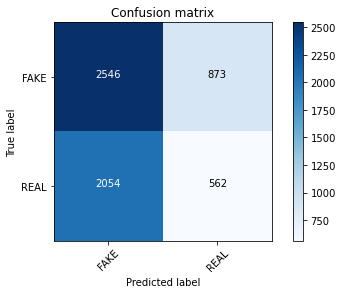

In [34]:
from sklearn import metrics
import numpy as np
import itertools
score = metrics.accuracy_score(y_test,y_pred1)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.5149958574979288

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.55      0.74      0.63      3419
           1       0.39      0.21      0.28      2616

    accuracy                           0.51      6035
   macro avg       0.47      0.48      0.46      6035
weighted avg       0.48      0.51      0.48      6035

